In [1]:

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Grootdraai_key = "__Grootdraai_Dam__:sv_recorder"


        Date       WRYM        Pywr
0 1920-10-01  350.32999  347.112110
1 1920-10-02  350.32999  346.764221
2 1920-10-03  350.32999  346.416331
3 1920-10-04  350.32999  346.377672
4 1920-10-05  350.32999  346.317055


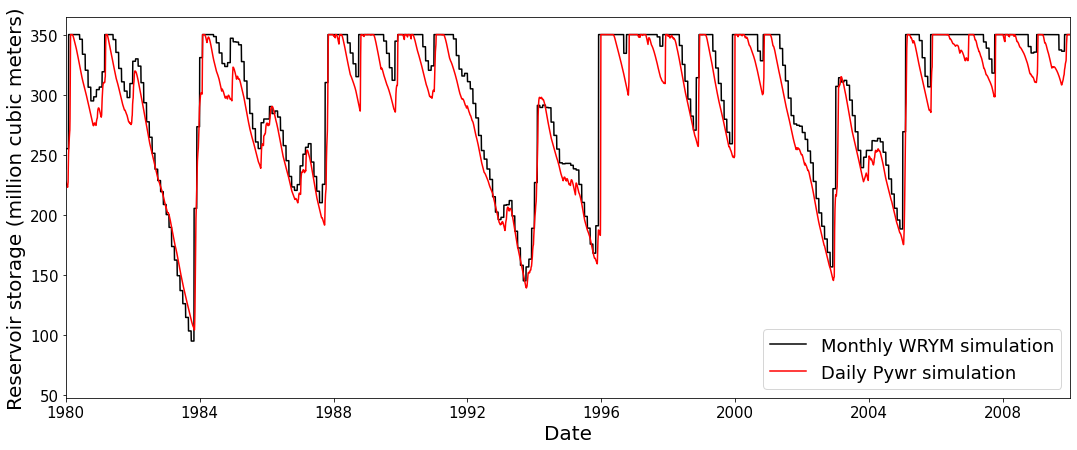

In [2]:
#Grootdraai_volume = pd.read_hdf("Grootdraai2_updated_recorders_dataframes_results.h5", Grootdraai_key)
Grootdraai_volume = pd.read_hdf("Uncoupled_recorders_dataframes_results.h5", Grootdraai_key)
#Grootdraai_volume_monthly = pd.read_csv("Pywr_monthly.csv", parse_dates=['Date'])#pd.read_hdf("Grootdraai_uncoupled_recorders_monthly_dataframes_results.h5", Grootdraai_key)
groot_Yield = pd.read_csv("WRYM_Groot.csv", parse_dates=['Date'])
flow_timeseries = []
Grootdraai_volume = Grootdraai_volume[0].to_numpy()
for i in range(0, len(Grootdraai_volume)):
    flow_timeseries.append(Grootdraai_volume[i][0])
    
    
for i in range(0, len(groot_Yield)-1):
    groot_Yield["Pywr"].values[i] =flow_timeseries[i]
groot_Yield.set_index('Date')   
print(groot_Yield.head())
#groot_Yield.plot()
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
sns.lineplot(data=groot_Yield, x='Date', y = "WRYM", label = "Monthly WRYM simulation", color = "black")
sns.lineplot(data=groot_Yield, x='Date', y = "Pywr", label = "Daily Pywr simulation", color = "red")
#sns.lineplot(data=groot_Yield, x='Date', y = "WRYM", label = "", color = "black")
#sns.lineplot(data=groot_Yield, x='Date', y = "Pywr", label = "", color = "red")

#sns.lineplot(data=Grootdraai_volume_monthly, x= 'Date' , y = 'Flow', label = "Monthly Pywr simulation", color = "orange")

start_date = datetime.strptime('01/01/1980 00:00','%d/%m/%Y %H:%M')
end_date = datetime.strptime('01/01/2010 00:00','%d/%m/%Y %H:%M')
plt.xlim([start_date, end_date])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Reservoir storage (million cubic meters)', fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Grootdraai_flow_calib_zoomed.png', dpi = 300)
plt.show()

